In [1]:
%pylab inline
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot


Populating the interactive namespace from numpy and matplotlib


In [2]:

np.random.seed(42)
# sites
N = 100

# reads

n_reads = np.random.poisson(lam=10, size=N)
x = np.random.normal(0, 2, N)

# make the x a probibility
p = np.exp(x)/(1+np.exp(x))

y = np.random.binomial(n=n_reads, p=p, size=N)

ratio = y/n_reads

ordered_x = x[x.argsort()]
ordered_y = y[x.argsort()]
ordered_reads = n_reads[x.argsort()]
ordered_ratio = ratio[x.argsort()]

Text(0.5, 1.0, 'Methylated reads ratio')

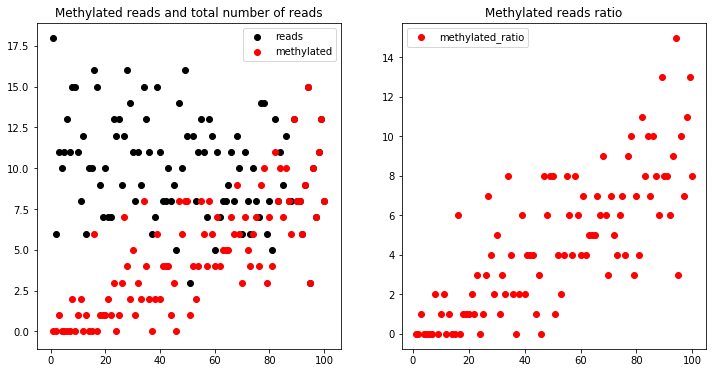

In [3]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121)
ax.scatter(np.arange(1, len(ordered_x)+1), ordered_reads, color='black', label="reads")
ax.scatter(np.arange(1, len(ordered_x)+1), ordered_y, color='red', label="methylated")
ax.legend()
ax.set_title('Methylated reads and total number of reads')

ax = fig.add_subplot(122)
ax.scatter(np.arange(1, len(ordered_x)+1), ordered_y, color='red', label="methylated_ratio")
ax.legend()
ax.set_title('Methylated reads ratio')


# LM

In [4]:
lm_model = sm.OLS(ratio, x)
lm_fit = lm_model.fit()
print(lm_fit.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.266
Model:                            OLS   Adj. R-squared (uncentered):              0.259
Method:                 Least Squares   F-statistic:                              35.87
Date:                Tue, 28 Jan 2020   Prob (F-statistic):                    3.40e-08
Time:                        09:03:52   Log-Likelihood:                         -71.795
No. Observations:                 100   AIC:                                      145.6
Df Residuals:                      99   BIC:                                      148.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

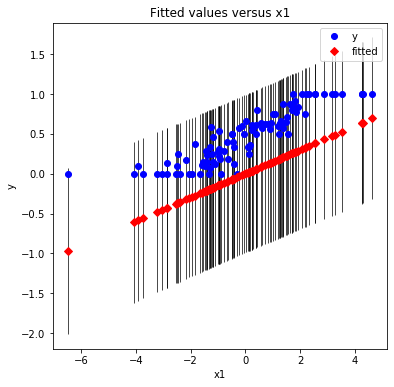

In [5]:
fig, ax = plt.subplots(figsize=(6,6))
fig = sm.graphics.plot_fit(lm_fit, 0, ax=ax)

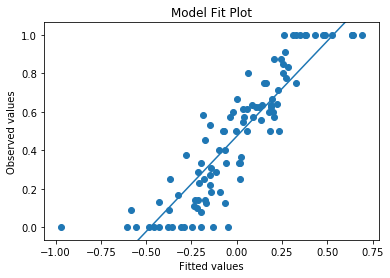

In [6]:
y_pred_linear = lm_fit.predict(x)

fig, ax = plt.subplots()
ax.scatter(y_pred_linear, ratio)
line_fit = sm.OLS(ratio, sm.add_constant(y_pred_linear, prepend=True)).fit()
abline_plot(model_results=line_fit, ax=ax)


ax.set_title('Model Fit Plot')
ax.set_ylabel('Observed values')
ax.set_xlabel('Fitted values');

# GLM

In [7]:
glm_model = sm.GLM(y/n_reads, x, family=sm.families.Binomial(), weights=n_reads)
glm_fit = glm_model.fit()
print(glm_fit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       99
Model Family:                Binomial   Df Model:                            0
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -33.739
Date:                Tue, 28 Jan 2020   Deviance:                       12.557
Time:                        09:03:52   Pearson chi2:                     10.9
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9682      0.197      4.919      0.0

In [8]:
print(glm_fit.params)

[0.9682382]


In [9]:
nobs = glm_fit.nobs
y_actual = ratio
yhat = glm_fit.mu

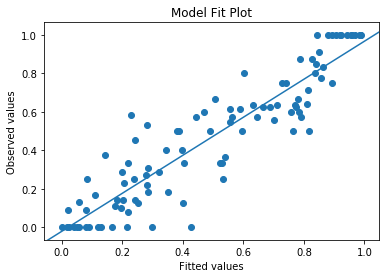

In [10]:

fig, ax = plt.subplots()
ax.scatter(yhat, y_actual)
line_fit = sm.OLS(y_actual, sm.add_constant(yhat, prepend=True)).fit()
abline_plot(model_results=line_fit, ax=ax)


ax.set_title('Model Fit Plot')
ax.set_ylabel('Observed values')
ax.set_xlabel('Fitted values');